#  Unit 2.4b Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
- What is a database schema?

Schema is essentially the category/column of a table.

- What is the purpose of identity Column in SQL database?

The purpose of an identity Column in a SQL database is to help us know what the rest of the column is about, what kinds of data types it will contain, and any other relevant information. 

- What is the purpose of a primary key in SQL database?

A primary key is something that is used to identify someone. The primary key (i.e. id) should be unique to each user so that it is easy to tell who is who. 

- What are the Data Types in SQL table?

Integers, structures (lists, dictionaries, etc.), strings, floats, and many more. 

In [14]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()

# varchar = string
# 255 = max length

(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_dob', 'DATE', 0, None, 0)


## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?

A connection object is an object that is created using the sqlite3.connect() method to connect to a SQLite database. It represents a connection to a database file and provides methods to execute SQL commands and interact with the database. After looking it up, I think that the connection object acts like a network connection by functioning as a connection to the database. 

- Same for cursor object?

The cursor object is used to execute SQL commands and fetch data from the database. It acts as a pointer to a specific row or a set of rows in the database.

The cursor object allows the application to execute SQL commands and retrieve data from the database by providing methods such as execute() and fetchall(). The execute() method is used to execute an SQL command and the fetchall() method is used to fetch all the data retrieved from the database.

- Look at conn object and cursor object in VSCode debugger. What attributes are in the object?

For the conn object, I see that some of its attributes include in_transaction, isolation_level, and row_factory. For the cursor object, I see that some of its attributes include arraysize, lastrowid, row_factory, and rowcount. 

- Is "results" an object?  How do you know?

Yes, "results" is an object because it not only appears under the the list of local variables, but it also includes data used as a part of the functionality of the program. It includes the attributes of each user, such as their name, their uid, and their date of birth. 

In [15]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()



(1, 'Thomas Edison', 'toby', 'sha256$ZT05sMUA1mk3H6Lq$60ed1ccba236310cb90017aa4f9d8ad67f03fb32b7d65eb238b12d43251c79e4', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$eZQdMMnHASwF7XKd$1d4700e9d59061d74f34a82aab7de8272bf4563f25dfaf94eaa9d3614f9b45eb', '2023-03-14')
(3, 'Alexander Graham Bell', 'lex', 'sha256$xI282ptvCKrsM4eP$4bc2884d721759eabd0bafce73cdabf05d6eff93c99607eba495b7e912398c86', '2023-03-14')
(4, 'Eli Whitney', 'whit', 'sha256$JQmp12ICLm8R8Cmt$0ca94acddbd9a76a8186d6e80c9a8b098902fe170cdc1068eb6d4bebfcfd25f0', '2023-03-14')
(5, 'Indiana Jones', 'indi', 'sha256$UnudFvPfNH4X2fte$2e8b19d2ea257e5df335acbda0f64a99624c194459233dabf7fcf71a95504508', '1920-10-21')
(6, 'Marion Ravenwood', 'raven', 'sha256$zALYyq1UqDR9APsU$c2dac7193db49d5bca46ff7b3e70777640d066e442575507a3e367f7964d2d0d', '1921-10-21')
(7, 'emu', 'f', 'sha256$CbFoi7OCDlrV9WRc$0862e9ffdd390f1c26dd4defc9be6d653fff87b3f7ba3286b4f2b7db2139d7b8', '2007-01-12')
(8, 'urmom', 'lolurmomandamongusmen', 'amongusmen', '0531-02

## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row

-  Compare create() in both SQL lessons.  What is better or worse in the two implementations?

The create() function in the OOP was called on an object. The imperative version involves creating numerous variables within the function rather than the objects. Both of these have their own pros and cons. The imperative version is less error prone, but also less efficient. The converse is true for the create() in the OOP version. Imperative version does not censor your password. Using OOP might be easier if one is trying to work with large amounts of data. If one is trying to work with a small amount of data, imperative might work better. 

-  Explain purpose of SQL INSERT.   Is this the same as User __init__?

The purpose of the SQL INSERT statement in this code is to insert a new row of data into the "users" table of a SQLite database. The INSERT INTO statement specifies the name of the table and the columns where the data should be inserted, and the VALUES clause provides the values to be inserted into those columns. The ? placeholders are used to prevent SQL injection attacks by sanitizing user input.

The INSERT INTO statement in this code is similar to the __init__ method of a User class in that both are used to create a new record or object in the database. However, there are some differences. The INSERT INTO statement only inserts data into a table in the database, while the __init__ method of a User class creates a new instance of a class in memory.


In [3]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()

#create()

## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?

The "hacked" part in the code is meant to provide a password that meets the minimum length requirement (2 characters) for security purposes. The message variable is set to "hacked" in this case to indicate that the password was automatically set.

- Explain try/except, when would except occur?

The try/except block is used to handle exceptions that may occur during the execution of the SQL command. In this case, the try block contains the SQL command to update the password for the specified user, and the except block catches any sqlite3. Error exceptions that might be raised during the execution of the command. If an exception occurs, the code inside the except block is executed.

- What code seems to be repeated in each of these examples to point, why is it repeated?

The code that connects to the database and creates a cursor object is repeated in each of these examples. This is because it is necessary to establish a connection to the database in order to execute SQL commands. The cursor object is used to execute the SQL commands and interact with the database. Once the SQL commands have been executed, the cursor and connection objects need to be closed to free up resources and prevent memory leaks.

In [15]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?

DELETE can be a dangerous operation if used carelessly as it permanently removes data from the database, and if it is used with caution, it can result in unintended data loss or corruption.

- In the print statemements, what is the "f" and what does {uid} do?

The "f" before the string is used for f-strings, which are a way of formatting strings that allows you to include the values of variables directly in the string. The curly braces {} surrounding uid indicate that the value of the uid variable should be inserted at that position in the string. This provides a much easier alternative than .format()

In [16]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.

- Why does the menu repeat?

The menu repeats so that if the user would like to perform multiple operations in one sitting (create and red for example), they can do so. They can perform as many operations as they would like until they don't input anything or make the program exit. 

- Could you refactor this menu?  Make it work with a List?

Yes, I could refactor this menu with a list, such as perhaps using list comprehension in Python. 

In [12]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


A new user record idc has been created
(0, 'id', 'INTEGER', 1, None, 1)
(1, 'name', 'VARCHAR(255)', 1, None, 0)
(2, 'price', 'FLOAT', 1, None, 0)
(3, 'release_date', 'DATE', 1, None, 0)
(4, 'developer', 'VARCHAR(255)', 1, None, 0)
(5, 'publisher', 'VARCHAR(255)', 1, None, 0)


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example.
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
    

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)


## Procedural Abstraction Question

Recalling the College Board criteria, procedural abstraction refers to the concept of breaking down a program into a set of code blocks or functions that perform specific tasks. These procedures or functions can be called from various parts of the program as needed, without the calling code having to know the internal details of how the function works. I can see procedural abstraction being used in this implementation, as there are separate functions for creating, reading, updating, and deleting user records in the database. The menu function acts as a controller that allows the user to choose which operation they want to perform. For example, in the create() function, it prompts the user to enter the required details, connects to the database, creates a cursor object, executes an SQL command to insert the data into the database, and then closes the cursor and connection objects. This entire process occurs by calling the create() function. Overall, since there are multiple functions with specific tasks included in this implementation, there is definitely procedural abstraction being used here. 

## Data Abstraction Question

Recalling the College Board criteria, data abstraction is essentially representing something (i.e a program) in a much more simplified, condensed method while hiding its more internal functions. Looking at this implementation, I do see data abstraction in this implementation. The implementation hides the details of the underlying database operations from the user, providing a simple interface for performing basic CRUD (Create, Read, Update, Delete) operations on their data. The user interacts with the program through a menu system, which hides the implementation details from the user and provides an abstraction of the available operations.

For example, when the user selects the "create" operation from the menu, they are prompted for the necessary information (name, uid, password, dob), and the implementation takes care of inserting this information into the database.

Regarding debugging, one possible example is if the user enters invalid input (e.g., a non-existent uid when updating or deleting a user). In this case, the implementation catches the exception raised by the database operation and prints an error message to the user. The error message provides a high-level explanation of the problem ("No uid was found in the table"), without revealing the underlying implementation details. This is an example of data abstraction, as the implementation is hiding the details of the database operation (in this case, the SQL query) from the user and providing a simplified, high-level interface for working with the data.

## Debugging Screenshots

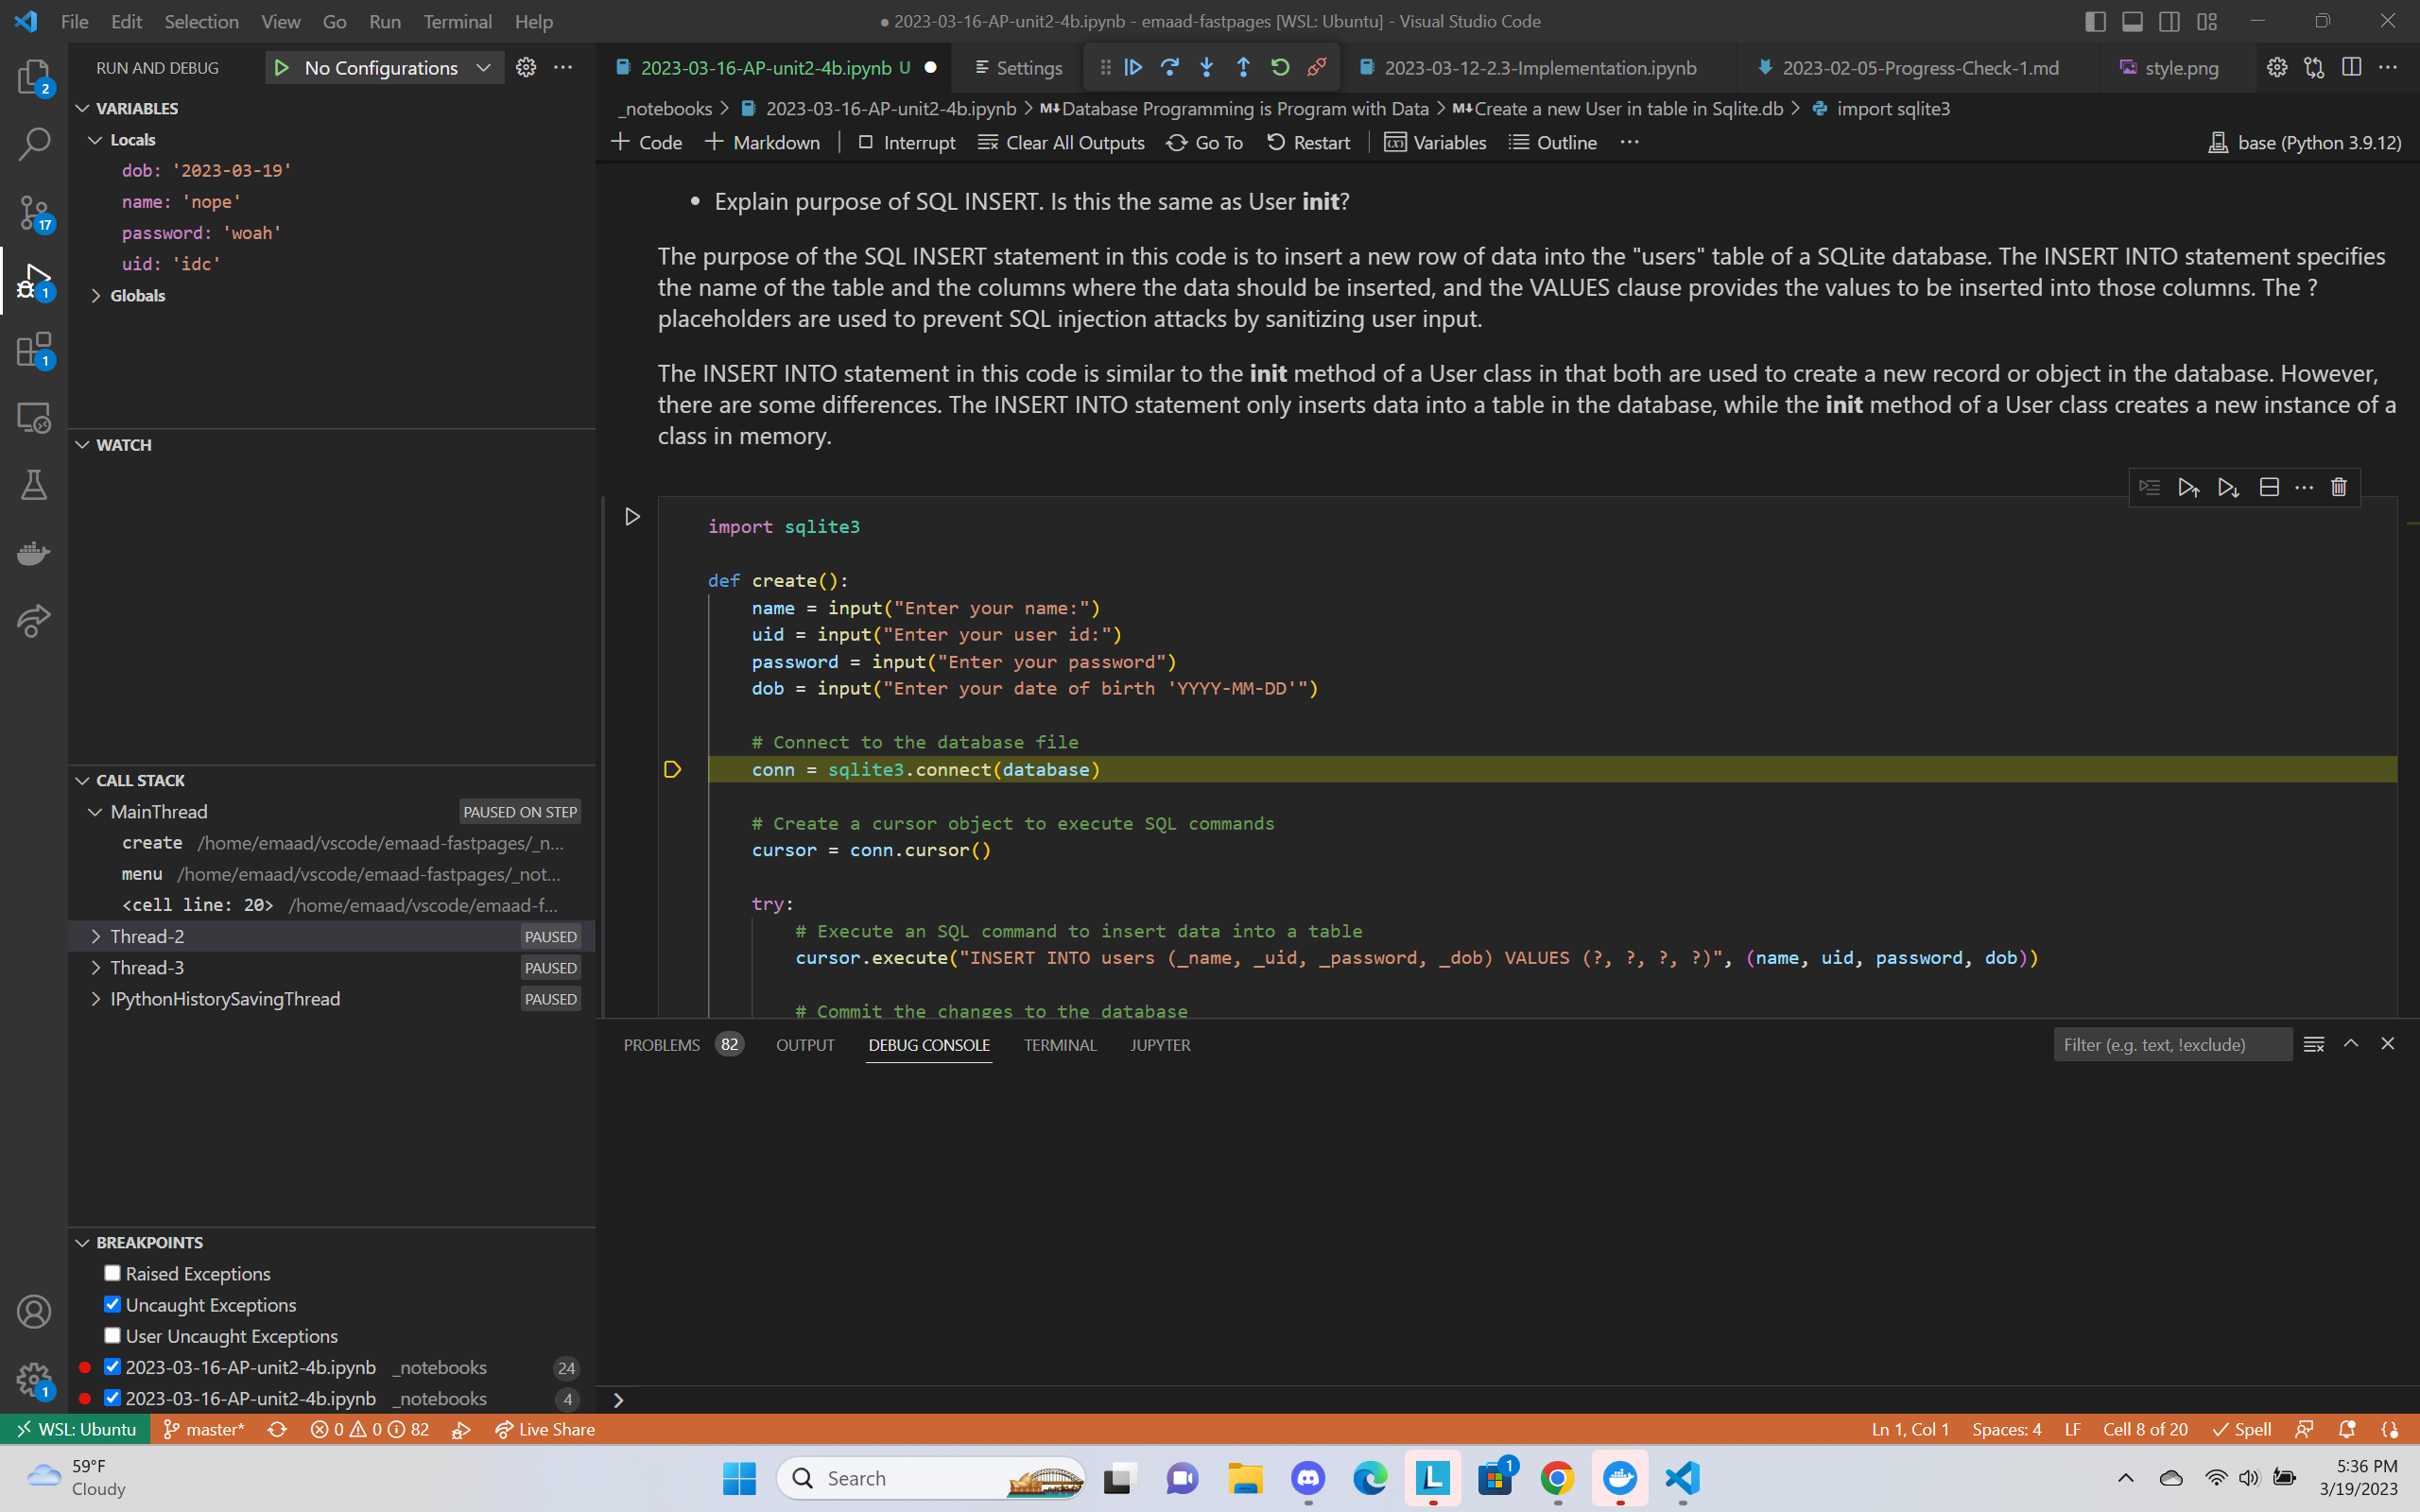

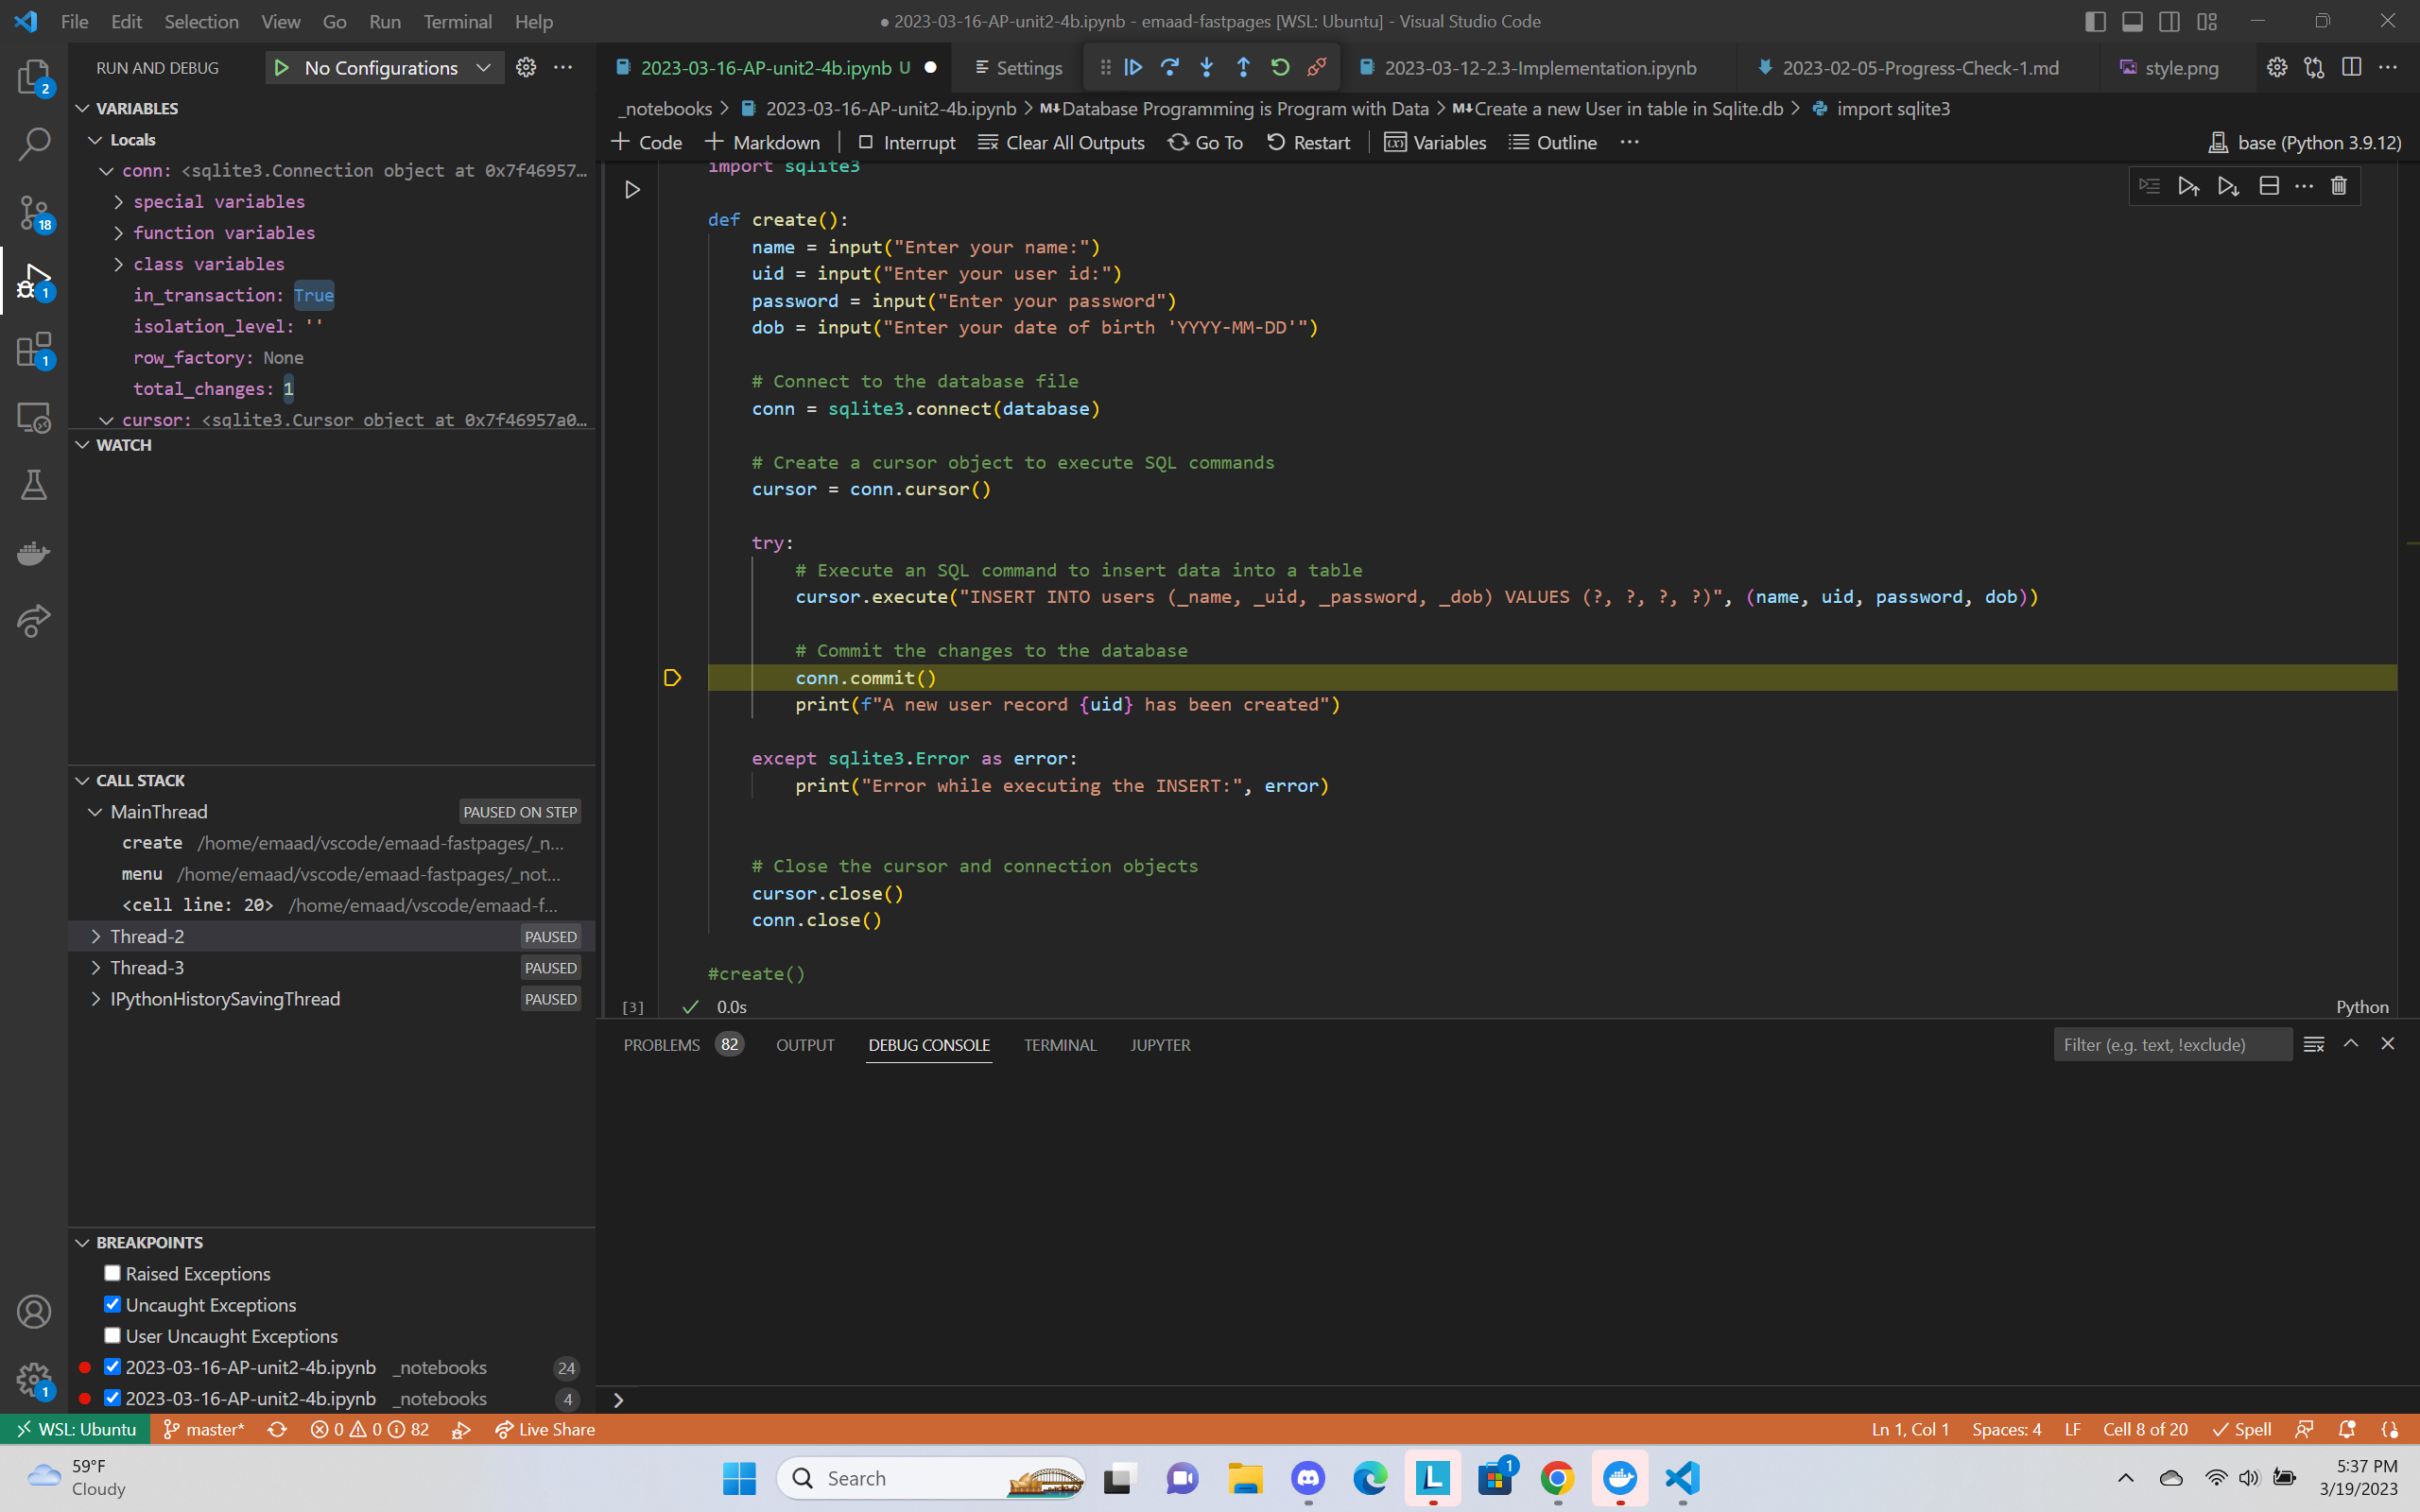

In [13]:
from PIL import Image
debug = Image.open('../images/attributes.png')
debug1 = Image.open('../images/conncursor.png')

display(debug)
display(debug1)



## Debugging Screenshots Analysis

In the first screenshot, I showed an example of what the code does if I choose the create operation ('C'). As you can see, when I am in debug mode, on the bottom left, you can see what I typed in for each of the different attributes, such as the date of birth, my password, and some of the other attributes. As I was doing that, the debugger highlighted what part of the code block was being executed in that moment, which allowed me to have a greater understand of what code does as it is being ran. In addition, as I step into more and more, you can see that the objects conn and cursor appear on the top left as well. The attributes for each of those objects can also be seen as well. Overall, playing around with the debugging provided me with a much better and more thorough understanding of how we are able to run and execute code so that it fulfills its purpose of providing us with the desired output. 

## My Own Imperative-Style SQlite Program

### Schema

In [16]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('games')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()

# varchar = string
# 255 = max length

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'name', 'VARCHAR(255)', 1, None, 0)
(2, 'price', 'FLOAT', 1, None, 0)
(3, 'release_date', 'DATE', 1, None, 0)
(4, 'developer', 'VARCHAR(255)', 1, None, 0)
(5, 'publisher', 'VARCHAR(255)', 1, None, 0)


### Create

In [20]:
import sqlite3

def create():
    name = input("Enter the name of your game:")
    price = input("Enter the price of your game:")
    release_date = input("Enter the date your game was (or is to be) released (YYYY-MM-DD)")
    developer = input("Enter the developer of your game")
    publisher = input("Enter the publisher of your game")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO games (name, price, release_date, developer, publisher) VALUES (?, ?, ?, ?, ?)", (name, price, release_date, developer, publisher))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new game record {name} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()

#create()

A new game record Smash Bros Ultimate has been created


### Read

In [21]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM games').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#read()



(1, 'Mario Party 9', 169.0, '2012-02-03', 'NDcube', 'Nintendo')
(2, 'Legend of Zelda: Tears of the Kingdom', 69.99, '2023-05-12', 'Nintendo Entertaining Planning and Development', 'Nintendo')
(3, 'Smash Bros Ultimate', 59.88, '2018-12-07', 'Masahiro Sakurai', 'Nintendo')


### Update

In [22]:
import sqlite3

def update():
    name = input("Enter name to update")
    price = input("Enter updated price")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()


### Delete

In [27]:
import sqlite3

def delete():
    name = input("Enter the name of the game to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM games WHERE name = ?", (name,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {name} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with name {name} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

### Menu

In [31]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


(1, 'Mario Party 9', 169.0, '2012-02-03', 'NDcube', 'Nintendo')
(2, 'Legend of Zelda: Tears of the Kingdom', 69.99, '2023-05-12', 'Nintendo Entertaining Planning and Development', 'Nintendo')
(4, 'Super Mario 3D Land', 34.45, '2011-11-03', '1-Up Studio', 'Nintendo')
(6, 'Smash Ultimate', 59.99, '2018-12-07', 'Masahiro Sakurai', 'Nintendo')
A new game record Wii Party has been created
(1, 'Mario Party 9', 169.0, '2012-02-03', 'NDcube', 'Nintendo')
(2, 'Legend of Zelda: Tears of the Kingdom', 69.99, '2023-05-12', 'Nintendo Entertaining Planning and Development', 'Nintendo')
(4, 'Super Mario 3D Land', 34.45, '2011-11-03', '1-Up Studio', 'Nintendo')
(6, 'Smash Ultimate', 59.99, '2018-12-07', 'Masahiro Sakurai', 'Nintendo')
(7, 'Wii Party', 39.99, '2010-07-08', 'NDcube', 'Nintendo')
The row with name Smash Ultimate was successfully deleted
(1, 'Mario Party 9', 169.0, '2012-02-03', 'NDcube', 'Nintendo')
(2, 'Legend of Zelda: Tears of the Kingdom', 69.99, '2023-05-12', 'Nintendo Entertaining 